# Day 15 In-Class Assignment: Evaluating Models

## Goals for today's assignment

* Describe the utility of fitting trendlines to data, in the context of making predictions about the future
* Use best-fit lines to make predictions about future values
* Quantitatively and qualitatively describe how to determine the Goodness of fit for a given line

## 1. Coming to a Consensus on Goodness of Fit

#### &#9989;&nbsp; **1.1** In the pre-class assignment, you were tasked with coming up with an algorithm for determining the goodness of fit (Part 2.2). Discuss with your group the different algorithms that you each came up with. What are the differences between each of your algorithms? What are the benefits of each algorithm? What are the drawbacks?

**As a group,** reach a consensus on a good algorithm for determining the goodness of fit. Write your group’s algorithm in the cell below. **Keep in mind what was discussed in the introductory presentation.**

<font size=+3>&#9998;</font> My group decided to use the sum of sqaured residuals model 


## **BEFORE MOVING ON CHECK WITH AN INSTRUCTOR**

## 2. Modeling the Air Atop Everest

The higher you are above sea level, the thinner the air gets. For instance, in Denver (elevation: 1 mile, or 1600 meters), air density is about 12% lower than it is in East Lansing. For every eight breaths you take in Michigan, you’ll need nine breaths in Denver to get the equivalent amount of air.

This difference in air density with altitude can be lethal for mountain climbers, where the density of air can be a third or less the value at sea level. Meaning that for every one breath you take in Michigan, you’d need to take *three* breaths on top of Mount Everest to get the equivalent amount of air.

You are working for a company that specializes in selling air tanks to climbers. You’ve been tasked with writing a piece of code that can determine the density of air for a given altitude so that your company can calculate how many air tanks a climber will need. 

You don’t have much of a physics or chemistry background, so you’re not sure how to make a physical model for this situation. But you do have data from a previous expedition, where the climbers took measurements of the density at different heights. 

####  &#9989;&nbsp; **2.1** Use the data provided to test out different models. Decide on one model that you feel best fits the data. 

The three models you should test out are:

### Linear Model
$$y = Ax + B$$

### Quadratic Model
$$y = Ax^2 + Bx + C$$

### Exponential Model
$$y = A\exp(-Bx) + C$$


In [1]:
#Data to use for your model
#Height is in kilometers, density is in kg/m^3
import numpy as np
height = np.array([0.0,0.17,0.34,0.52,0.69,0.86,1.03,1.21,1.38,1.55,1.72,1.9,2.07,2.24,2.41,2.59,2.76,2.93,3.1,3.28,3.45,3.62,3.79,3.97,4.14,4.31,4.48,4.66,4.83,5.0])
density = np.array([1.2,1.23,1.19,1.2,1.17,1.12,1.07,1.05,1.06,1.04,1.03,1.01,0.95,0.97,0.96,0.93,0.93,0.88,0.87,0.9,0.83,0.84,0.84,0.8,0.79,0.8,0.78,0.77,0.73,0.76])

[-0.09803687  1.20175884]


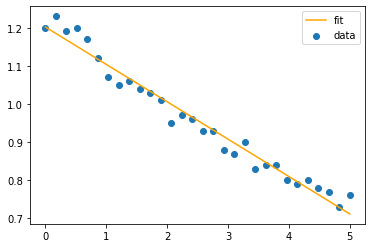

In [13]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#Linear Model 
def line_function(height, A, B):
    return (A * height) + B

#use curve fit to find parameters
popt, pcov = curve_fit(line_function, height, density)
print(popt)

#Find the expected values
A_expected = popt[0]  
B_expected = popt[1]

y_expected_line = line_function(height, A_expected, B_expected)

#plot the data
plt.scatter(height, density, label = "data")
plt.plot(height, y_expected_line, color = "orange", label = "fit")
plt.legend()

[ 0.0083611  -0.13984237  1.2353752 ]


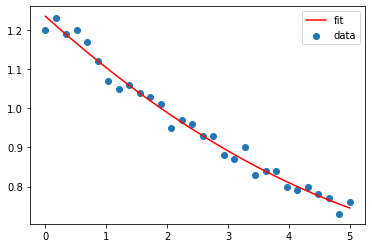

In [27]:
#Quadratic Model 
def quadratic_function(height, A, B, C):
    return A * (height)**2 + (B* height)+C

#use curve fit to find parameters
popt, pcov = curve_fit(quadratic_function, height, density)
print(popt)

#Find the expected values
A_expected = popt[0]  
B_expected = popt[1]
C_expected = popt[2]

y_expected_quad = quadratic_function(height, A_expected, B_expected, C_expected)

#plot the data
plt.scatter(height, density, label = "data")
plt.plot(height, y_expected_quad, color = "red", label = "fit")
plt.legend()

[0.86951264 0.16868524 0.368071  ]


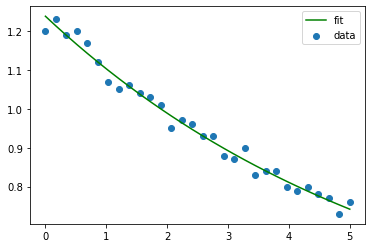

In [28]:
#Exponential Model 
def exp_function(height, A, B, C):
    return A * np.exp(-B*height) +C

#use curve fit to find parameters
popt, pcov = curve_fit(exp_function, height, density)
print(popt)

#Find the expected values
A_expected = popt[0]  
B_expected = popt[1]
C_expected = popt[2]

y_expected_exp = exp_function(height, A_expected, B_expected, C_expected)

#plot the data
plt.scatter(height, density, label = "data")
plt.plot(height, y_expected_exp, color = "green", label = "fit")
plt.legend()

####  &#9989;&nbsp; **2.2** Code up the algorithm you defined in part 1 and *quantitatively* compare how well each model fits the data.

In [29]:
#Linear 
linear=np.sqrt(sum((density-y_expected_line)**2))
quadratic=np.sqrt(sum((density-y_expected_quad)**2))
exponential=np.sqrt(sum((density-y_expected_exp)**2))
print(linear, quadratic, exponential)

0.13725490062059534 0.10260089357125679 0.10302579699439003


####  &#9989;&nbsp; **2.3** Which model best fits the data? Is it substantially better than the other models?

The Quadratic Model Looks as if it fits best in this case scenario. This is not substantial by any means as the exponential is very close as well being about 0.0004 larger then the quadratic model.

####  &#9989;&nbsp; **2.4** Mount Everest is 8.85 kilometers high. What does each model predict for the density of air on top of Mount Everest?

In [30]:
air_density_linear = line_function(8.85, A_expected, B_expected)
air_density_quad = quadratic_function(8.85, A_expected, B_expected, C_expected)
air_density_exp = exp_function(8.85, A_expected, B_expected, C_expected)

print("the air density from the linear model is", air_density_linear) 
print("the air density from the quadratic model is",air_density_quad)
print("the air density from the exponential model is", air_density_exp)


the air density from the linear model is 7.863872106307487
the air density from the quadratic model is 69.96333914431669
the air density from the exponential model is 0.563474871477861


####  &#9989;&nbsp; **2.5** What do you believe the density of of air is at the top of Mount Everest? Justify your answer using the results from the previous questions.

<font size=+3>&#9998;</font>
Due to the fact that we said our quadratic model is the closest, I would normally say that 69.96 would be the the density. However,this value does not make sense with our downward trend on the graphs. Becuase our exponential function was very close to the quadratic function, I will say that the air density on top of Mount Eversest is around 0.56 kg/m^3. 

## 3. (Time Permitting) Presenting your Results

**Make a one-slide presentation explaining what model your group has chosen and why you've chosen it.** When you have finished your slide, call over an instructor and present your results to them.